In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('physics_discoveries.csv')
df

,Date,Person,Discovery,Country of origin
0,250 BCE,Archimedes,Archimedes' principle,Greece
1,1514,Nicholas Copernicus,Heliocentrism,Poland
2,1589,Galileo Galilei,Galileo's Leaning Tower of Pisa experiment,Italy
3,1609,Kepler,Kepler's first law of planetary motion,Germany
4,1609,Kepler,Kepler's second law of planetary motion,Germany
...,...,...,...,...
87,2000,Multiple,Tau neutrino discovered,Multiple
88,2003,Multiple,WMAP observations of cosmic microwave background,Multiple
89,2012,Peter Higgs,Higgs Boson discovered,UK
90,2015,Multiple,Gravitational waves detected,Multiple


# A GENERAL UNDERSTANDING OF THE DATA

### Line chart of the number of discoveries over time

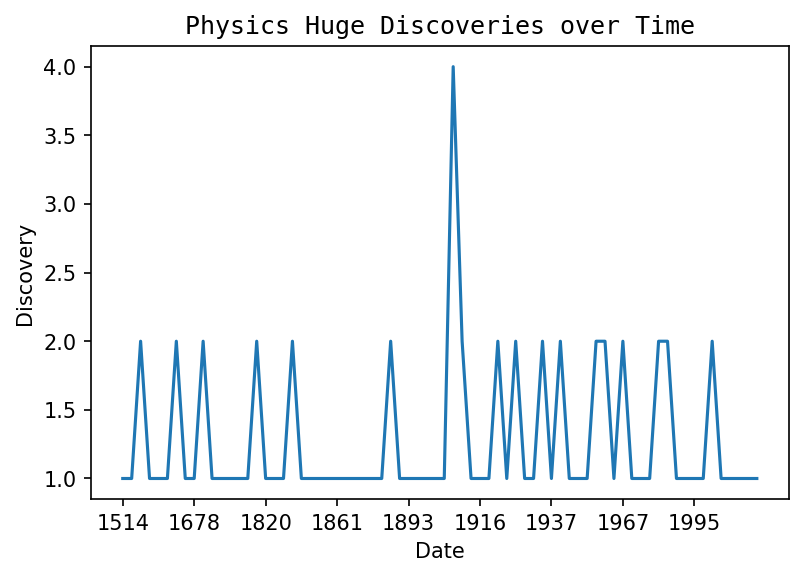

In [3]:
discoveries = df.groupby('Date', as_index=False).count()

plt.figure(dpi=150)

c = sns.lineplot(x='Date', y='Discovery', data=discoveries)

plt.title('Physics Huge Discoveries over Time', fontdict={'fontfamily': 'monospace'})

c.set(xticks=discoveries.Date[0::8])

plt.show()

### Bar Chart of the number of discoveries per century

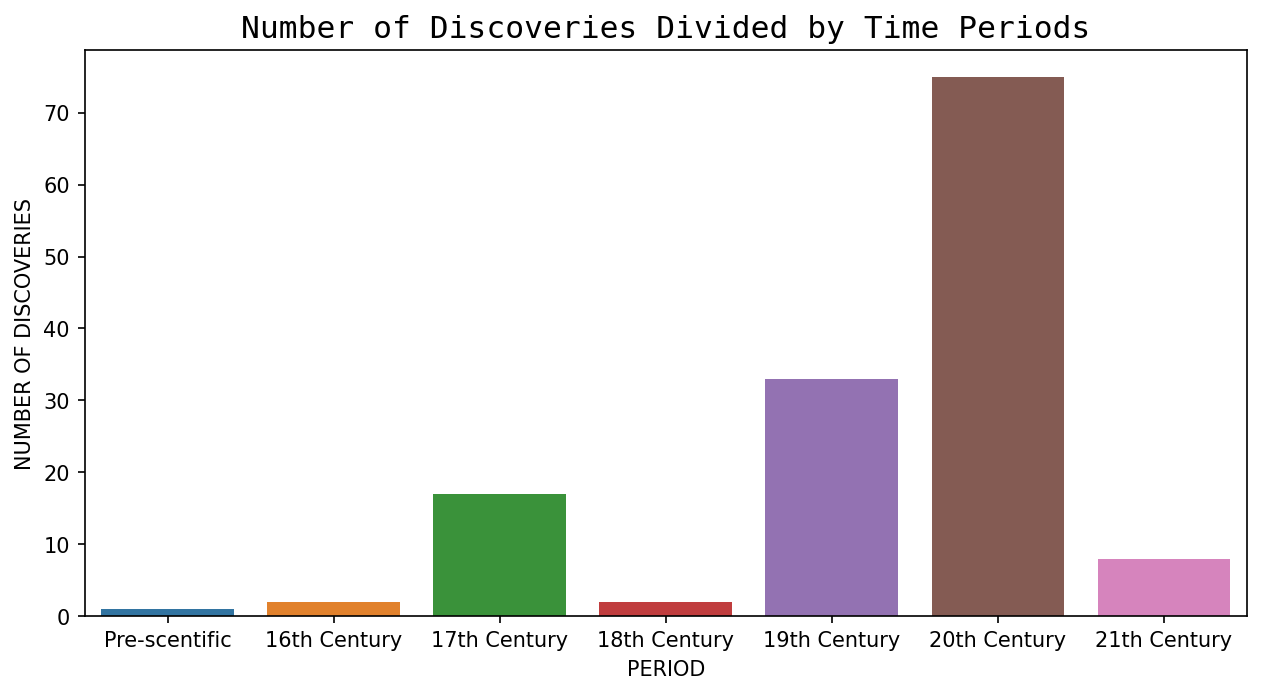

In [4]:
dates = df.Date
pre_scentific = df.iloc[:1]
century_16th = pd.DataFrame()
century_17th = pd.DataFrame()
century_18th = pd.DataFrame()
century_19th = pd.DataFrame()
century_20th = pd.DataFrame()
century_21th = pd.DataFrame()

for date in dates:
    item = df.loc[df.Date == date]
    if date[:2] == '15':
        century_16th = century_16th.append(item, ignore_index=True)
    elif date[:2] == '16':
        century_17th = century_17th.append(item, ignore_index=True) 
    elif date[:2] == '17':
        century_18th = century_18th.append(item, ignore_index=True)
    elif date[:2] == '18':
        century_19th = century_19th.append(item, ignore_index=True)
    elif date[:2] == '19':
        century_20th = century_20th.append(item, ignore_index=True)
    elif date[:2] == '20':
        century_21th = century_21th.append(item, ignore_index=True)

bar_df = pd.DataFrame({
    'PERIOD': [
        'Pre-scentific', 
        '16th Century', 
        '17th Century', 
        '18th Century', 
        '19th Century', 
        '20th Century', 
        '21th Century'
    ],
    'NUMBER OF DISCOVERIES': [
        pre_scentific.Discovery.count(), 
        century_16th.Discovery.count(), 
        century_17th.Discovery.count(),
        century_18th.Discovery.count(),
        century_19th.Discovery.count(),
        century_20th.Discovery.count(),
        century_21th.Discovery.count()
    ]
})

plt.figure(figsize=(10, 5), dpi=150)

plt.title('Number of Discoveries Divided by Time Periods', fontdict={'fontfamily': 'monospace', 'fontsize': 15})

sns.barplot(x='PERIOD', y='NUMBER OF DISCOVERIES', data=bar_df)

plt.show()

### Histogram and Map(?) of the location of the discoveries

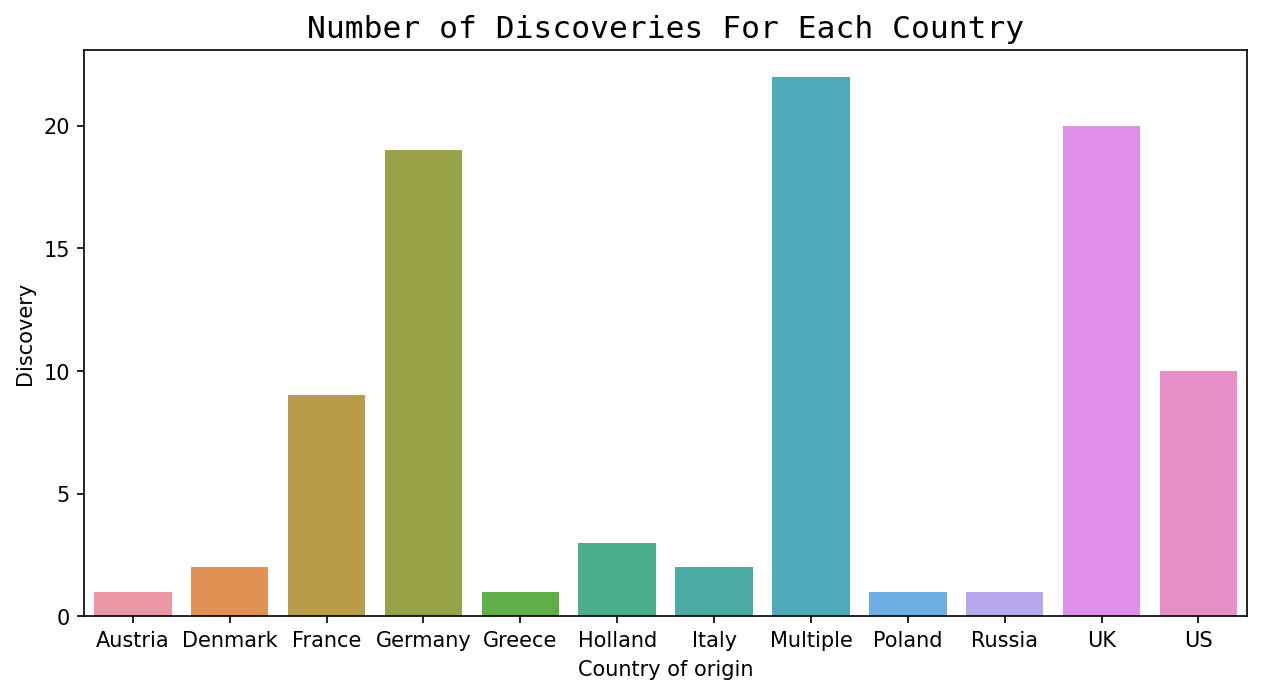

In [10]:
country_df = df.groupby(['Country of origin']).count()

plt.figure(figsize=(10, 5), dpi=150)

plt.title('Number of Discoveries For Each Country', fontdict={'fontfamily': 'monospace', 'fontsize': 15})

sns.barplot(x=country_df.index, y='Discovery', data=country_df)

plt.show()

### Number of discoveries moving from Europe to America over time ???

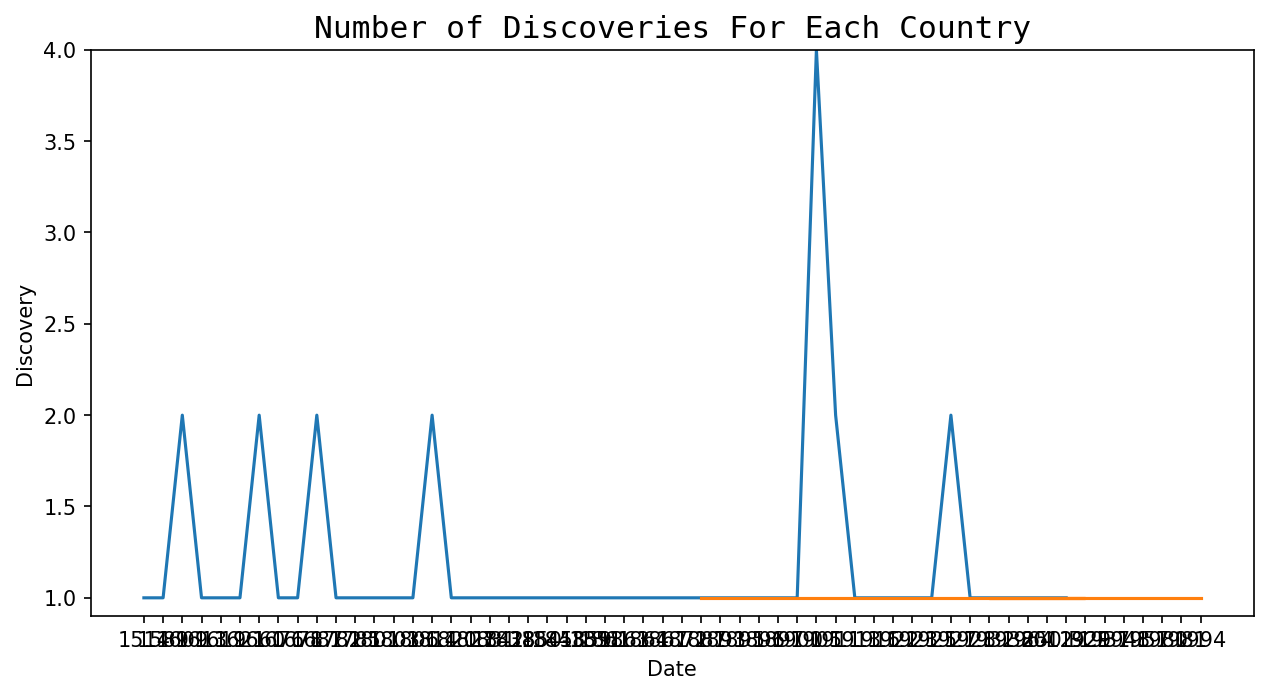

In [29]:
# Create new dataframes for europe, us, and multiple nationalities
europe_df = pd.DataFrame()
us_df = pd.DataFrame()
multiple_df = pd.DataFrame()

for c in df['Country of origin']:
    if c == 'Austria' or c == 'Denmark' or c == 'France' or c == 'Germany' or c == 'Greece' or c == 'Holland' or c == 'Italy' or c == 'Poland' or c == 'UK': 
        item = df.loc[df['Country of origin'] == c]
        europe_df = europe_df.append(item, ignore_index=True)
    elif c == 'US':
        item = df.loc[df['Country of origin'] == c]
        us_df = us_df.append(item, ignore_index=True)
    elif c == 'Multiple':
        item = df.loc[df['Country of origin'] == c]
        multiple_df = multiple_df.append(item, ignore_index=True)
        
europe_df.drop_duplicates(inplace=True, ignore_index=True)
us_df.drop_duplicates(inplace=True, ignore_index=True)
multiple_df.drop_duplicates(inplace=True, ignore_index=True)

europe_discoveries = europe_df.groupby('Date', as_index=False).count()
us_discoveries = us_df.groupby('Date', as_index=False).count()

# Plot line charts
plt.figure(figsize=(10, 5), dpi=150)

plt.title('Number of Discoveries For Each Country', fontdict={'fontfamily': 'monospace', 'fontsize': 15})

c = sns.lineplot(x='Date', y='Discovery', data=europe_discoveries)
c = sns.lineplot(x='Date', y='Discovery', data=us_discoveries)


c.set_ylim([0.9,4])

plt.show()

### Number of discoveries made by groups of people with different nationalities over time

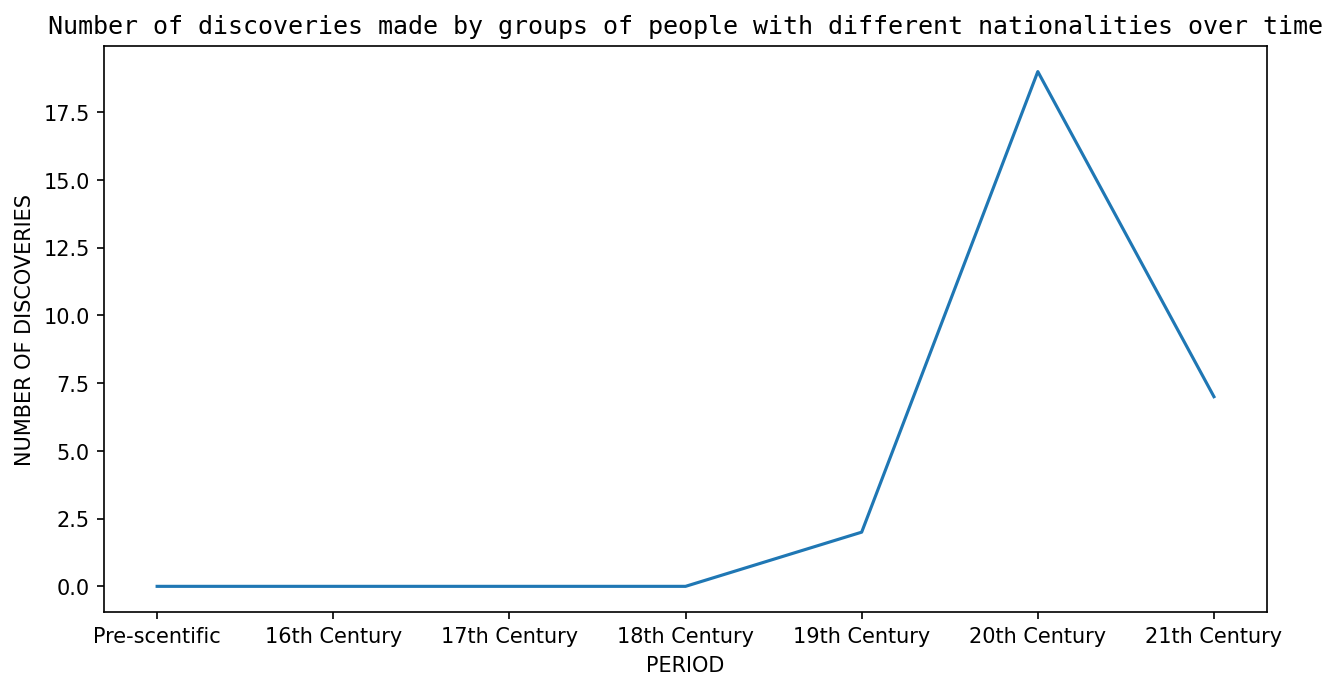

In [47]:
dates = multiple_df.Date
pre_scentific = pd.DataFrame()
century_16th = pd.DataFrame()
century_17th = pd.DataFrame()
century_18th = pd.DataFrame()
century_19th = pd.DataFrame()
century_20th = pd.DataFrame()
century_21th = pd.DataFrame()

for date in dates:
    item = multiple_df.loc[multiple_df.Date == date]
    if date[:2] == '15':
        century_16th = century_16th.append(item, ignore_index=True)
    elif date[:2] == '16':
        century_17th = century_17th.append(item, ignore_index=True) 
    elif date[:2] == '17':
        century_18th = century_18th.append(item, ignore_index=True)
    elif date[:2] == '18':
        century_19th = century_19th.append(item, ignore_index=True)
    elif date[:2] == '19':
        century_20th = century_20th.append(item, ignore_index=True)
    elif date[:2] == '20':
        century_21th = century_21th.append(item, ignore_index=True)

line_df = pd.DataFrame({
    'PERIOD': [
        'Pre-scentific', 
        '16th Century', 
        '17th Century', 
        '18th Century', 
        '19th Century', 
        '20th Century', 
        '21th Century'
    ],
    'NUMBER OF DISCOVERIES': [
        0, 
        0, 
        0,
        0,
        century_19th.Discovery.count(),
        century_20th.Discovery.count(),
        century_21th.Discovery.count()
    ]
})

# Plot line charts
plt.figure(figsize=(10, 5), dpi=150)

plt.title('Number of discoveries made by groups of people with different nationalities over time', fontdict={'fontfamily': 'monospace', 'fontsize': 12})

c = sns.lineplot(x='PERIOD', y='NUMBER OF DISCOVERIES', data=line_df, sort=False)

plt.show()